In [1]:
import numpy as np

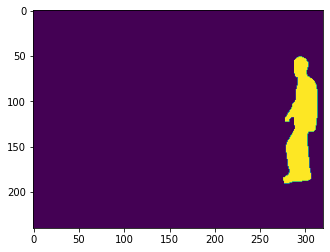

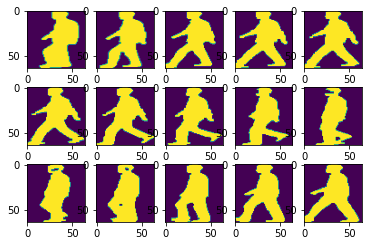

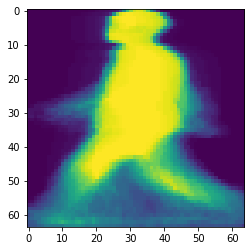

In [2]:
# coding: utf-8

# # Gait Energy Image

# In[1]:


import os
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread
# from scipy.misc import imresize
import cv2
from skimage.transform import resize


# In[2]:


files = os.listdir(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\001\nm-01\090')
images = [imread(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\001\nm-01\090'+'\\'+f) for f in files]


# In[3]:


plt.imshow(images[0])


# In[4]:


def mass_center(img,is_round=True):
    Y = img.mean(axis=1)
    X = img.mean(axis=0)
    Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
    X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
    if is_round:
        return int(round(X_)),int(round(Y_))
    return X_,Y_

def image_extract(img,newsize):
    x_s = np.where(img.mean(axis=0)!=0)[0].min()
    x_e = np.where(img.mean(axis=0)!=0)[0].max()
    
    y_s = np.where(img.mean(axis=1)!=0)[0].min()
    y_e = np.where(img.mean(axis=1)!=0)[0].max()
    
    x_c,_ = mass_center(img)
#     x_c = (x_s+x_e)//2
    x_s = x_c-newsize[1]//2
    x_e = x_c+newsize[1]//2
    img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
    return cv2.resize(img,newsize)


# In[5]:


images = [image_extract(i,(64,64)) for i in images]


# In[6]:


plt.figure()
for i in range(15):
    plt.subplot(3,5,i+1)
    plt.imshow(images[i])
plt.show()


# In[7]:


gei = np.mean(images,axis=0)


# In[8]:


plt.imshow(gei)
plt.show()

In [39]:
def Period_Detection(gallery: np.array, gallery_shape: tuple, alpha = 0.470, beta = 0.961) -> np.array:
    '''
    hip, knee, and ankle are 0.470, 0.715, 0.961
    '''
    start = round(gallery_shape[0] * alpha)
    end = round(gallery_shape[0] * beta)
    
    period_result = np.empty(gallery.shape[0])
    
    for i, img in enumerate(gallery):
        move_region_aggregate = 0
        
        for h in range(start, end):
            
            nonzero_index = list(np.nonzero(img[h])[0])
    
            if not nonzero_index:
                continue
            left_most, right_most = nonzero_index[0], nonzero_index[-1]
            
            move_region_aggregate  = move_region_aggregate + (right_most - left_most)
            
        
        move_region_aggregate /= float((end - start + 1))
      
        period_result[i] = move_region_aggregate
    if period_result.shape[0] == 1:
        return period_result
    period_result = (period_result - np.min(period_result)) / np.ptp(period_result)
    
 
    
    return period_result
    

In [101]:
files = os.listdir(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\001\nm-01\162')
images = np.array([cv2.imread(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh\001\nm-01\162'+'\\'+f, -1) for f in files])


In [102]:
period = Period_Detection(gallery=images, gallery_shape=images[0].shape)

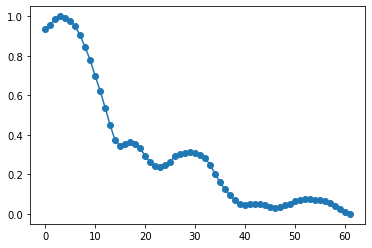

In [103]:
plt.plot([i for i, _ in enumerate(period)], period, '-o')

In [121]:
def Tk(m=0.3, nc=5) -> list:
    result = []
    for k in range(1, nc+1):
        tmp = [k/(nc+1) - (m/2), k/(nc+1) + m/2]
        result.append(tmp)
    return result

In [122]:
Tk()

[[0.016666666666666663, 0.31666666666666665],
 [0.18333333333333332, 0.4833333333333333],
 [0.35, 0.65],
 [0.5166666666666666, 0.8166666666666667],
 [0.6833333333333333, 0.9833333333333334]]

In [106]:
tk2_image = images[np.where((period > Tk()[1][0]) & (period < Tk()[1][1]))]

In [123]:
def GEI(images: np.array, resize: tuple, draw: bool = False) -> list:

    def mass_center(img,is_round=True):
        Y = img.mean(axis=1)
        X = img.mean(axis=0)
        Y_ = np.sum(np.arange(Y.shape[0]) * Y)/np.sum(Y)
        X_ = np.sum(np.arange(X.shape[0]) * X)/np.sum(X)
        if is_round:
            return int(round(X_)),int(round(Y_))
        return X_,Y_

    def image_extract(img,newsize):
        x_s = np.where(img.mean(axis=0)!=0)[0].min()
        x_e = np.where(img.mean(axis=0)!=0)[0].max()

        y_s = np.where(img.mean(axis=1)!=0)[0].min()
        y_e = np.where(img.mean(axis=1)!=0)[0].max()

        x_c,_ = mass_center(img)
    #     x_c = (x_s+x_e)//2
        x_s = x_c-newsize[1]//2
        x_e = x_c+newsize[1]//2
        img = img[y_s:y_e,x_s if x_s>0 else 0:x_e if x_e<img.shape[1] else img.shape[1]]
        return cv2.resize(img,newsize)

    images = [image_extract(i, resize) for i in images]
    gei = np.mean(images,axis=0)
    if draw:
        plt.imshow(gei)
        plt.show()
    
    return gei

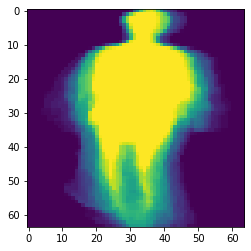

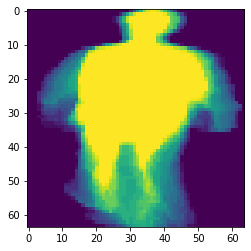

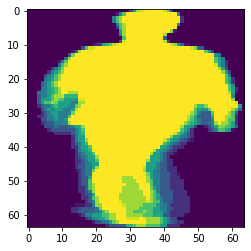

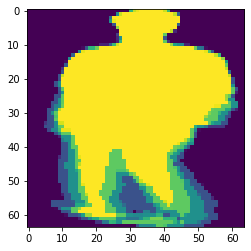

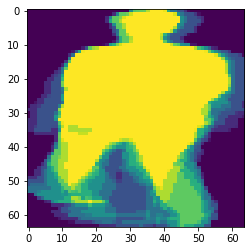

In [125]:
for i in Tk():
    tk_image = images[np.where((period > i[0]) & (period < i[1]))]
    GEI(tk_image, (64, 64), draw=True)

In [112]:
g = os.walk(r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh', topdown=False)

In [ ]:
root = r'C:\Users\User\Desktop\Aaron\College-level Applied Research\CASIA-B\GaitDatasetB-silh'
subjects = os.listdir(root)
variations = os.listdir(root +'\\'+ subjects[0])
angles = os.listdir(root +'\\'+ subjects[0] + '\\' + variations[0])

ourputdir = r'C:\Users\User\Desktop\Aaron\College-level Applied Research\PEI_output'

if not os.path.isdir(ourputdir):
    os.mkdir(ourputdir)

for sub in subjects:
    sub_dir = f'{ourputdir}\\{sub}'
    if not os.path.isdir(sub_dir):
        os.mkdir(sub_dir)
    for var in variations:
        var_dir = f'{sub_dir}\\{var}'
        if not os.path.isdir(var_dir):
            os.mkdir(var_dir)
        for ang in angles:
            ang_dir = f'{var_dir}\\{ang}'
            if not os.path.isdir(ang_dir):
                os.mkdir(ang_dir)
            
            images_dir = f'{root}\\{sub}\\{var}\\{ang}'
            images_filename = os.listdir(images_dir)

            images = np.array([cv2.imread(images_dir+'\\'+ f, -1) for f in images_filename])
            period = Period_Detection(gallery=images, gallery_shape=images[0].shape)
            for i, minmax in enumerate(Tk()):
                tk_image = images[np.where((period > minmax[0]) & (period < minmax[1]))]
                gei = GEI(tk_image, (64, 64))
                cv2.imwrite(f'{ang_dir}\gei_{i}.png', gei)